In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# k-Means

In [2]:
#Implementação utilizada nesta demonstração
from sklearn.cluster import KMeans


In [6]:
#Utilizando o dataset Iris (já demonstrado anteriormente)
dfIris = pd.read_csv('Iris.csv').set_index('Id')
dfIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
#Configurações do k-Means
kmeansConfig = KMeans(n_clusters=3, n_init=100) #n_init é o número de execuções com diferentes centroides semente
kmeans_results  = kmeansConfig.fit(dfIris.iloc[:,0:4])
kmeans_results.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

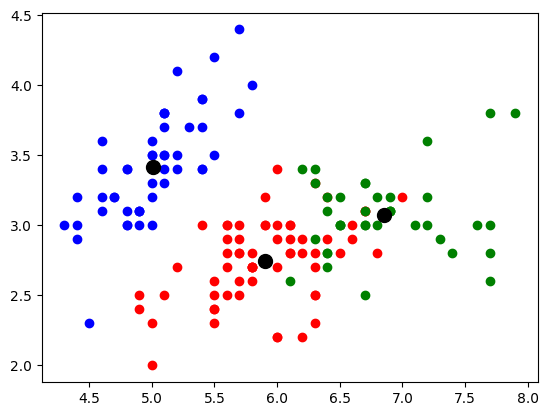

In [5]:
#Rótulos do agrupamento
lbKmeans = kmeans_results.labels_

#Visualizando os grupos (clusters) nas duas primeiras features: SepalLengthCm e SepalWidthCm
plt.scatter(dfIris.loc[lbKmeans == 0,'SepalLengthCm'], dfIris.loc[lbKmeans == 0,'SepalWidthCm'], c = 'red', label = 'Iris-setosa')
plt.scatter(dfIris.loc[lbKmeans == 1,'SepalLengthCm'], dfIris.loc[lbKmeans == 1,'SepalWidthCm'], c = 'blue', label = 'Iris-versicolour')
plt.scatter(dfIris.loc[lbKmeans == 2,'SepalLengthCm'], dfIris.loc[lbKmeans == 2,'SepalWidthCm'], c = 'green', label = 'Iris-virginica')   

#Mostra os centroids considerados (pontos pretos)
plt.scatter(kmeansConfig.cluster_centers_[:,0], kmeansConfig.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')  


# Agrupamento hierárquico

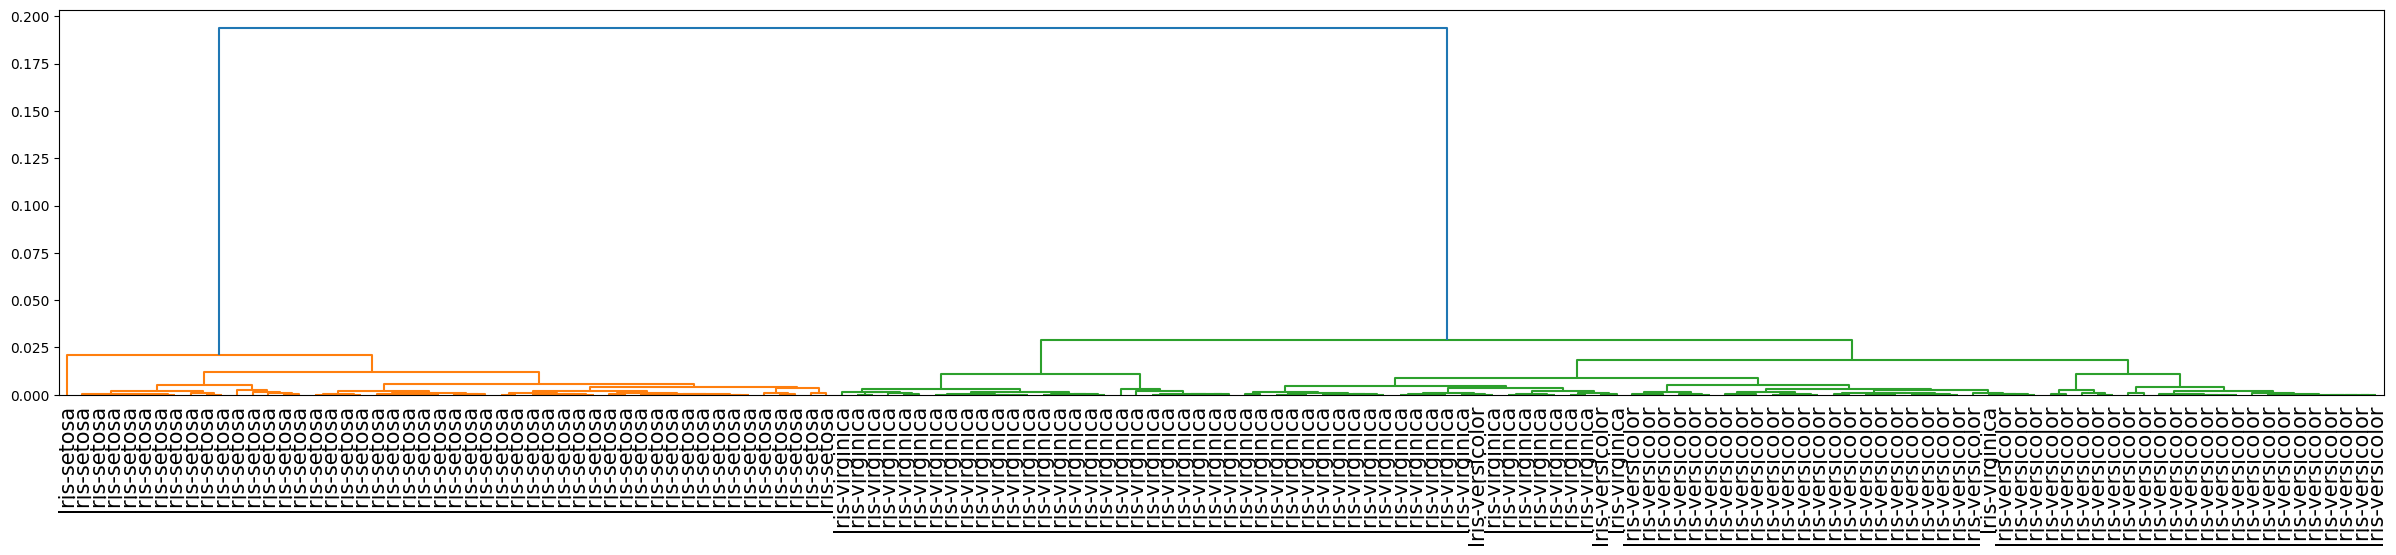

In [8]:
#Implementação utilizada
import scipy.cluster.hierarchy as sch

#Área da figura
plt.subplots(figsize=(30, 5))

#Realiza o agrupamento hirárquico e mostra os resultados em um dendrograma
#Critério de agrupamento = Complete
#Métrica de proximidade = Cosine
dendrogram = sch.dendrogram(sch.linkage(dfIris.iloc[:,0:4], method  = "complete", metric='cosine'),labels=list(dfIris.iloc[:,4].values), leaf_font_size=15)



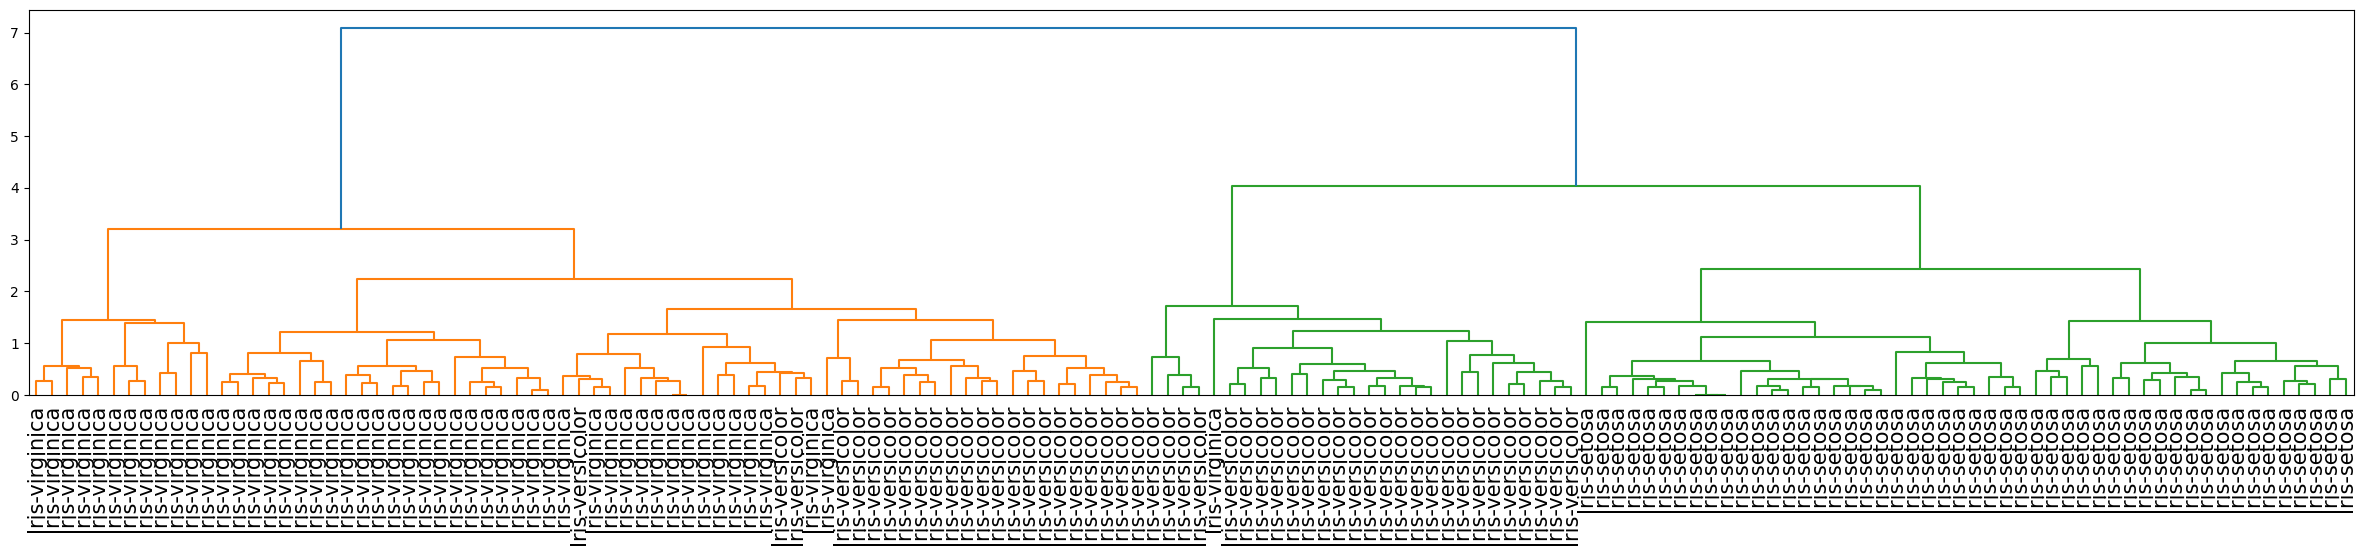

In [7]:
plt.subplots(figsize=(30, 5))

#Critério de agrupamento = Complete
#Métrica de proximidade = Euclidean
dendrogram = sch.dendrogram(sch.linkage(dfIris.iloc[:,0:4], method  = "complete", metric='euclidean'),labels=list(dfIris.iloc[:,4].values), leaf_font_size=15)



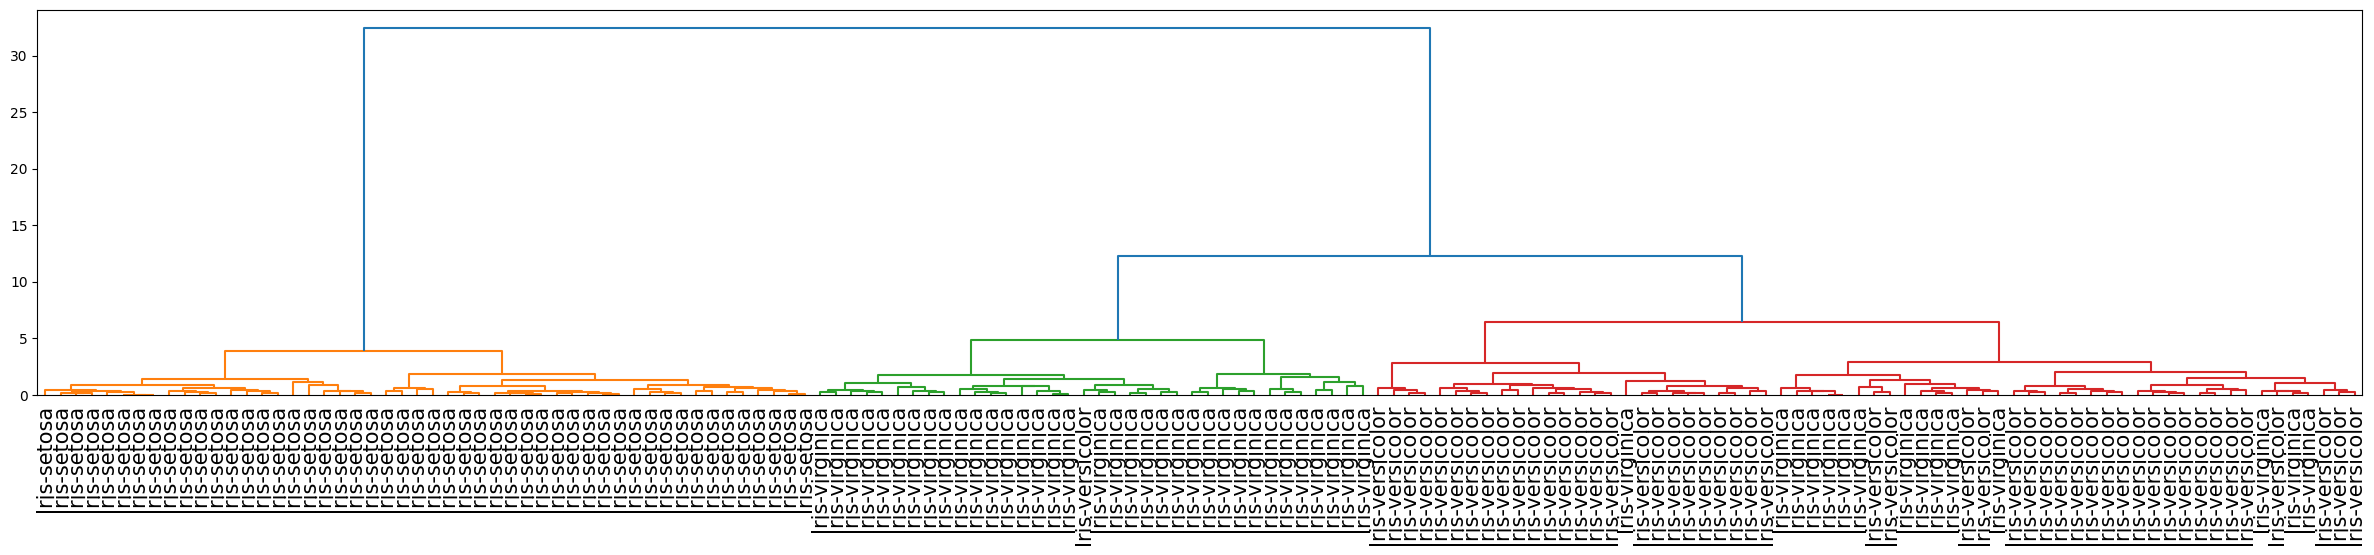

In [11]:
plt.subplots(figsize=(30, 5))

#Critério de agrupamento = Ward
#Métrica de proximidade = Euclidean
dendrogram = sch.dendrogram(sch.linkage(dfIris.iloc[:,0:4], method  = "ward", metric='euclidean'),labels=list(dfIris.iloc[:,4].values), leaf_font_size=15)


### Definindo um ponto de corte manualmente

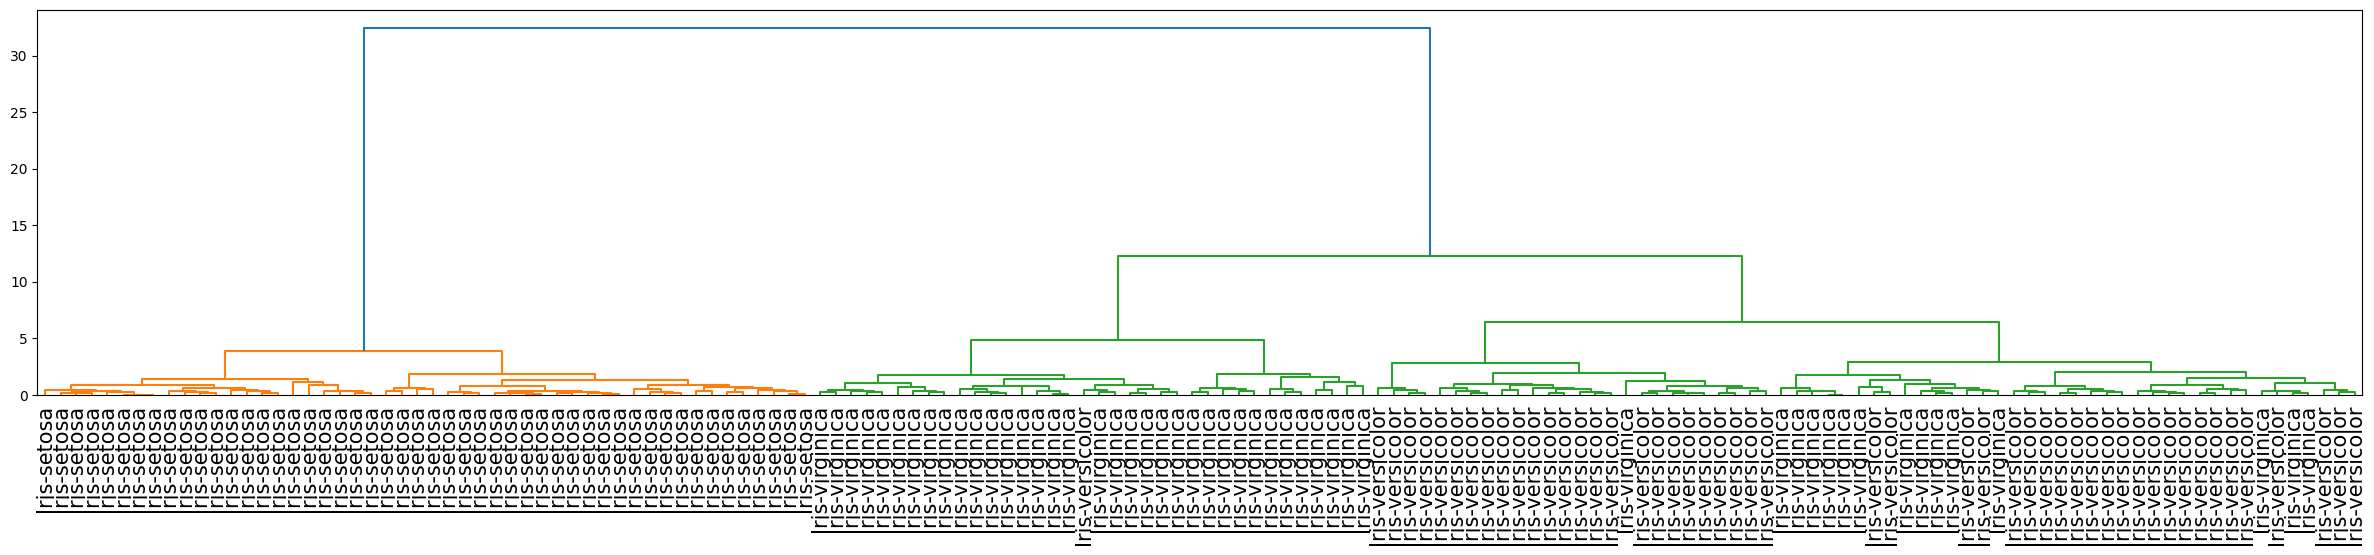

In [10]:
plt.subplots(figsize=(30, 5))

#Critério de agrupamento = Ward
#Métrica de proximidade = Euclidean
#color_threshold -> define o ponto de corte do dendrograma
dendrogram = sch.dendrogram(sch.linkage(dfIris.iloc[:,0:4], method  = "ward", metric='euclidean'),
                            labels=list(dfIris.iloc[:,4].values),
                            leaf_font_size=15, color_threshold=20)


# DBSCAN

In [14]:
#Implementação considerada
from sklearn.cluster import DBSCAN

#É interessante estudar o que acontece com o ruídos (noises) ao alterar os valores de eps e min_samples
#eps deve ser interpretado com a medida de proximidade considerada
dbscanConfig = DBSCAN(eps=0.5, min_samples=5)

#Usando o dataset Iris
dbscanResults = dbscanConfig.fit(dfIris.iloc[:,0:4])

dbscanResults.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        2,  2,  1,  2,  1, -1, -1,  2,  1, -1,  1, -1,  1, -1,  2,  1,  1,
       -1,  1,  5,  1, -1,  1,  2,  2,  2,  2,  1, -1,  1,  1,  1,  5, -1,
       -1,  2, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  5,
        3, -1,  3, -1, -1, -1, -1, -1,  4,  4,  3, -1, -1,  4,  4, -1, -1,
       -1,  3, -1, -1, -1,  3, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  4,  5,  3,  3, -1,  5,  3,  3,  4, -1,  4, -1,  5])

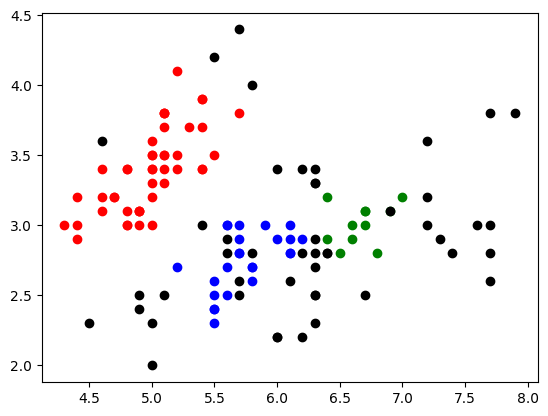

In [15]:
lbDBSCAN = dbscanResults.labels_

plt.scatter(dfIris.loc[lbDBSCAN == 0,'SepalLengthCm'], dfIris.loc[lbDBSCAN == 0,'SepalWidthCm'], c = 'red')
plt.scatter(dfIris.loc[lbDBSCAN == 1,'SepalLengthCm'], dfIris.loc[lbDBSCAN == 1,'SepalWidthCm'], c = 'blue')
plt.scatter(dfIris.loc[lbDBSCAN == 2,'SepalLengthCm'], dfIris.loc[lbDBSCAN == 2,'SepalWidthCm'], c = 'green')   

#Ruídos, que possuem rótulos -1, são coloridos de preto
plt.scatter(dfIris.loc[lbDBSCAN == -1,'SepalLengthCm'], dfIris.loc[lbDBSCAN == -1,'SepalWidthCm'], c = 'black')   


### Outro exemplo - utilizando check-ins do Fourquare

In [16]:
#Para visualizar em mapas
import folium
from folium.plugins import HeatMap
dfCheckinBH = pd.read_csv('BHcheckins.txt', sep='\t', header=None)


In [17]:
#Para visualizar em mapas
import folium
from folium.plugins import HeatMap


#Configuração e execução do DBSCAN
dbscanConfig = DBSCAN(eps=0.001, min_samples=50)
dbscanResults = dbscanConfig.fit(dfCheckinBH)
dbscanResults.labels_


mapaBH = folium.Map(location=[-19.925684, -43.938196])

#-1 são pontos considerados ruídos (noises)
dfCheckinBH_filtered = dfCheckinBH[dbscanResults.labels_ !=-1]

print(len(dfCheckinBH))
print(len(dfCheckinBH_filtered))

pontos  = [[row[0],row[1]] for index, row in dfCheckinBH_filtered.iterrows()]

HeatMap(pontos).add_to(mapaBH)
mapaBH



9043
894


### Teste com a distância haversine

In [20]:
mapaBH = folium.Map(location=[-19.925684, -43.938196])

kms_por_radian = 6371.0088
#0.1 = 100 metros
epsilon = 0.1 / kms_por_radian #convertendo para radiano, scikit-learn trabalha com essa unidade

#demanda converter as coordenadas para radianos
db = DBSCAN(eps=epsilon, min_samples=60, metric='haversine').fit(np.radians(dfCheckinBH))

dfCheckinBH_filtered = dfCheckinBH[db.labels_ !=-1]

print(len(dfCheckinBH))
print(len(dfCheckinBH_filtered))

pontos  = [[row[0],row[1]] for index, row in dfCheckinBH_filtered.iterrows()]

HeatMap(pontos).add_to(mapaBH)
mapaBH


9043
496
